<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE6_LSE.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

# ❄️ ICE6: Least Squares 

**A note on this document**
This document is known as a Jupyter notebook; it is used in academia and industry to allow text and executable code to coexist in a very easy-to-read format. Blocks can contain text or executable code. To run the executable code in this notebook, click <a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE6_LSE.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>
 For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

## Least Sqaures Regression

We need to solve a least squares regression problem to find a linear equation that best fits the measured data. Let the measured data is given by $\mathbf{y} = (y_1, y_2, \cdots, y_n)$ and the corresponding values are given by $\mathbf{x} = (x_1, x_2, \cdots, x_n)$.

The goal is to find $m$ and $b$ such that $y = mx + b$ best approximates the linear relationship between $x$ and $y$.

Let's first plot the data

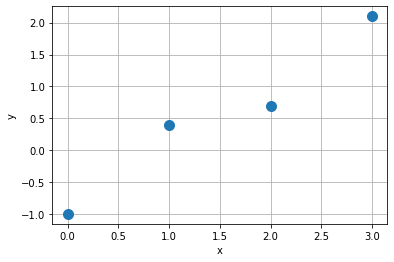

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.4, 0.7, 2.1])

plt.plot(x, y, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.show()

First, we can rewrite the line equation as $y = \mathbf{c} \cdot \mathbf{q}$, where

$\mathbf{c} = \begin{bmatrix} x & 1\end{bmatrix}$ and $\mathbf{q} = \begin{bmatrix} m \\ b\end{bmatrix} $. That is,

$y = mx + b = \begin{bmatrix} x & 1\end{bmatrix} \begin{bmatrix} m \\ b\end{bmatrix} = \mathbf{c} \cdot \mathbf{q}$ 

Given $\mathbf{x} = (x_1, x_2, \cdots, x_n)$ and $\mathbf{y} = (y_1, y_2, \cdots, y_n)$, we can obtain

$\begin{bmatrix} -1 \\ 0.4 \\ 0.7 \\ 2.1\end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\2 & 1 \\3 & 1 \end{bmatrix} \begin{bmatrix} m \\ b\end{bmatrix}$  or $\mathbf{y} = C\mathbf{q}$, 

where

$C = \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\x_3 & 1 \\x_4 & 1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 1 \\2 & 1 \\3 & 1 \end{bmatrix} $.

We can create the $C$ matrix using `np.vstack`

In [3]:
# x is a row vector.
# Use vstack to append a row vector, [1, 1, ,,, 1] at the end of x.
# It will be a 2 by n matrix.
# We need to transpose the 2 by n matrix to make it an n by 2 matrix
C = np.vstack([x, np.ones(len(x))]).T
print(C)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


Now use `np.linalg.lstsq` to solve for $\mathbf{q}$:

In [4]:
q = np.linalg.lstsq(C, y, rcond=None)[0]
print(q)
# or you can use
m, b = np.linalg.lstsq(C, y, rcond=None)[0]
print(m, b)


[ 0.96 -0.89]
0.9599999999999997 -0.8899999999999996


With $m=0.96$ and $b=-0.89$, the best fitting line is

$y = 0.96x-0.89$

Let's plot the line, $y = mx + b$ along with the data.

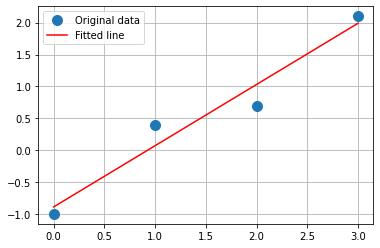

In [5]:
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.grid('on')
plt.show()

## Free fall example

Consider a body in free fall shown below. 

```{image} ./figures/FreeFall.png
:width: 200
:align: center
```

Suppose we measure the heights of the body every second after it is released at the initial height $y_0$ with the initial speed of $\dot{y}_0$.  Given the measurements, we want to estimate the initial height, the initial speed, and the gravitational acceleration.  

The acceleration of the body is given by

$\ddot{y} = -g$

By integrating it, we can find the velocity

$\dot{y} = -gt + \dot{y}_0$

By integrating it one more time, we can find the displacement

$y = -\frac{1}{2}gt^2 + \dot{y}_0t + y_0$

So, our model is

$\hat{y} = -\frac{1}{2}gt^2 + \dot{y}_0 t + y_0 = \begin{bmatrix} 1 & t & -\frac{t^2}{2} \end{bmatrix} \begin{bmatrix} y_0 \\ \dot{y}_o \\ g \end{bmatrix} $

Given the measurements, $\mathbf{y} = (y(t_0), y(t_1), \cdots, y(t_n))$ and $\mathbf{t} = (t_0, t_1, \cdots, t_n)$, we want to find $\mathbf{q} = \begin{bmatrix} y_0 & \dot{y}_o & g \end{bmatrix}^\top$ that minimizes the squared error, $||\mathbf{e}||^2$. With the measurements, we can reconstruct the matrix as follows


$\mathbf{y} = \begin{bmatrix} y(t_0) \\ y(t_0) \\ \vdots \\ y(t_n) \end{bmatrix} = \begin{bmatrix} 1 & t_0 & -\frac{t_0^2}{2} \\ 1 & t_1 & -\frac{t_1^2}{2} \\ \vdots & \vdots & \vdots \\ 1 & t_n & -\frac{t_n^2}{2} \end{bmatrix} \begin{bmatrix} y_0 \\ \dot{y}_o \\ g \end{bmatrix} $

With 
$C = \begin{bmatrix} 1 & t_0 & -\frac{t_0^2}{2} \\ 1 & t_1 & -\frac{t_1^2}{2} \\ \vdots & \vdots & \vdots \\ 1 & t_n & -\frac{t_n^2}{2} \end{bmatrix}$

we can rewrite it in

$\mathbf{y} = C \mathbf{q} $

Since $C$ is not a square matrix, there does not exist the inverse of $C$, which means we cannot find $\mathbf{q}$ by

$ \mathbf{q} = C^{-1} \mathbf{y}$

Instead, we need to use the least square estimate (LSE), which is given by

$ \mathbf{q} = (C^\top C)^{-1} C^\top \mathbf{y}$



Text(0, 0.5, 'height (m)')

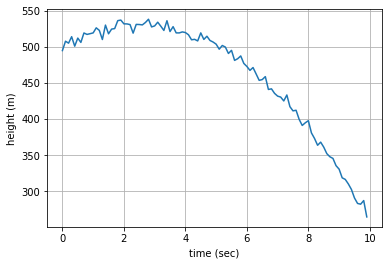

In [6]:
import matplotlib.pyplot as plt
t = np.arange(0, 10, 0.1)
y = np.array([494.94014461, 507.90896039, 505.22104446, 514.16752281,
       501.03760921, 512.27372226, 506.25729082, 519.31098721,
       517.35119455, 518.34500719, 519.43274428, 526.44327588,
       522.94440423, 510.27500976, 530.25935105, 518.20603986,
       524.71868822, 525.40621496, 536.39890016, 537.20679795,
       531.97549049, 531.89355501, 530.9691791 , 519.09709483,
       531.21151466, 531.05443774, 530.53020296, 533.87475854,
       538.36426786, 527.72764456, 529.10979202, 534.25255071,
       528.75549033, 522.85527636, 536.32133201, 521.3100716 ,
       528.1091566 , 519.46924694, 519.41092769, 520.79686406,
       519.93846816, 516.86770344, 509.90148208, 510.51326661,
       508.31253149, 519.44185445, 510.40323351, 514.81167221,
       508.93145792, 506.78927246, 503.84068939, 496.865354  ,
       501.99404182, 499.78788123, 490.93831227, 495.25334285,
       481.34690599, 483.62699738, 487.48676078, 477.13434071,
       472.93284874, 467.48609631, 471.42676396, 462.61029894,
       453.68093514, 454.75557321, 458.87031335, 441.0566181 ,
       441.89473809, 435.6396022 , 431.82595852, 430.4877946 ,
       425.13769744, 433.39377499, 417.19383723, 411.3984193 ,
       412.21729864, 399.65482787, 391.16441599, 394.84928496,
       397.76328403, 380.81427897, 373.16521311, 363.70635399,
       368.01513611, 361.12434462, 352.11033439, 347.76032976,
       345.46984985, 335.42433546, 330.60651309, 318.59015926,
       316.38849782, 310.13386233, 302.52012775, 290.65413548,
       283.08686336, 282.04215134, 287.05055972, 264.40202725])

plt.plot(t, y)
plt.grid('on')
plt.xlabel('time (sec)')
plt.ylabel('height (m)')

## 🚚 Deliverables

**Submit your code and the output plot in Gradescope (not Bitbucket).**

### Deliverable 1

Find $\mathbf{q}$ and provide a plot of the fitted line with the measurements. Your plots must have correct labels, units, and legend.

You can use <a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE6_LSE.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a> to run this program and download the figures. The following code snippet will be useful.

```Python
filename = "your_filename.png"
plt.savefig(filename) 
plt.show()

import google.colab.files  
google.colab.files.download(filename) 
```

Ensure you call `plt.savefig()` before `plt.show()`


### Deliverable 2

Suppose you had a capacitor that you wanted to find its value. You constructed an RC circuit and applied a 5V DC. A few seconds later, you disconnected the power source and measured the voltage across the capacitor. 

The voltage across the capacitor in an RC circuit is given by
$v(t) = v_0 e^{-t/\tau}, t\geq 0$

Find the time constant $\tau$ that best fits the model.  If the resistor in the circuit is  1 k$\Omega$, what is the value of the capacitor?  

Hint 1: The time constant in an RC circuit is $\tau = RC$. 
Hint 2: Use the logarithm to find a linear function of $\tau$.

Use the following measurements of $v(t)$.

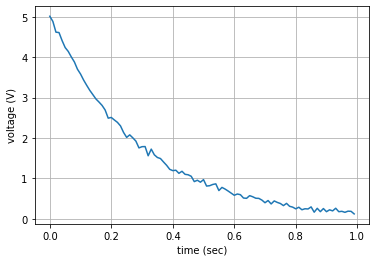

In [7]:
t = np.arange(0, 1,0.01)

v = np.array([5.01244283, 4.88438776, 4.61866927, 4.60894011, 4.41004693,
       4.23826769, 4.14274337, 4.00588297, 3.88199414, 3.70225232,
       3.58355439, 3.43455927, 3.30474357, 3.18078036, 3.07476507,
       2.96726969, 2.89063642, 2.80789063, 2.69423508, 2.49191736,
       2.50954028, 2.44712497, 2.38835945, 2.30025698, 2.13790825,
       2.01659547, 2.07912399, 2.00577069, 1.92508211, 1.7565095 ,
       1.7865158 , 1.78987426, 1.56199575, 1.72613664, 1.58584813,
       1.51952741, 1.49326173, 1.40786616, 1.32605959, 1.22720959,
       1.19448915, 1.20467148, 1.12784961, 1.1784009 , 1.10309822,
       1.09199671, 1.05440677, 0.92322795, 0.95694284, 0.90854489,
       0.97174071, 0.81287511, 0.82147023, 0.8520071 , 0.86750312,
       0.70163675, 0.77931194, 0.73922824, 0.69029541, 0.6377564 ,
       0.58477345, 0.61595619, 0.59972651, 0.51719116, 0.50915179,
       0.57589605, 0.5485081 , 0.51194423, 0.50774903, 0.46536343,
       0.40064362, 0.4548967 , 0.37060314, 0.44504432, 0.40862983,
       0.38155415, 0.32950763, 0.38447669, 0.31214141, 0.29181047,
       0.24943998, 0.28925818, 0.22684326, 0.25104928, 0.24648863,
       0.29750812, 0.16686111, 0.26215788, 0.17941954, 0.25641971,
       0.17907152, 0.22507161, 0.1988562 , 0.26396801, 0.17906211,
       0.18801865, 0.16303685, 0.19193568, 0.18761862, 0.12386653])

plt.plot(t, v)
plt.xlabel('time (sec)')
plt.ylabel('voltage (V)')
plt.grid('on')

Report the time constant $\tau$ and the capacitance $C$ and submit a plot of the fitted line with the measurements.